In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [8]:
data=pd.read_csv("Groceries_dataset.csv")
print("First 5 rows of dataset:")
print(data.head())

First 5 rows of dataset:
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [10]:
transactions = data .groupby("Member_number")["itemDescription"].apply(list).tolist()
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df=pd.DataFrame(te_array,columns=te.columns_)
print("\nShape of transaction matrix:",df.shape)


Shape of transaction matrix: (3898, 167)


In [11]:
print(data.columns)

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')


In [14]:
frequent_itemsets = apriori(df,min_support=0.01,use_colnames=True)
frequent_itemsets=frequent_itemsets.sort_values(by="support",ascending=False)

print("\nTop 10 Frequent Itemsets: ")
print(frequent_itemsets.head(10))


Top 10 Frequent Itemsets: 
       support                        itemsets
113   0.458184                    (whole milk)
69    0.376603              (other vegetables)
84    0.349666                    (rolls/buns)
94    0.313494                          (soda)
114   0.282966                        (yogurt)
106   0.233710                (tropical fruit)
85    0.230631               (root vegetables)
7     0.213699                 (bottled water)
89    0.206003                       (sausage)
1050  0.191380  (whole milk, other vegetables)


In [16]:
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1.0)
rules = rules.sort_values(by="lift",ascending=False)

print("\nTop 10 Association Rules:")
print(rules[['antecedents','consequents','support','confidence','lift']].head(10))


Top 10 Association Rules:
                                   antecedents  \
7309                      (rolls/buns, yogurt)   
7292   (whole milk, sausage, other vegetables)   
7298    (rolls/buns, yogurt, other vegetables)   
7303                     (whole milk, sausage)   
14811                           (curd, yogurt)   
14806                    (whole milk, sausage)   
7296         (whole milk, sausage, rolls/buns)   
7305                (yogurt, other vegetables)   
7297    (whole milk, yogurt, other vegetables)   
7304                     (rolls/buns, sausage)   

                                   consequents   support  confidence      lift  
7309   (whole milk, sausage, other vegetables)  0.013597    0.122120  2.428689  
7292                      (rolls/buns, yogurt)  0.013597    0.270408  2.428689  
7298                     (whole milk, sausage)  0.013597    0.259804  2.428575  
7303    (rolls/buns, yogurt, other vegetables)  0.013597    0.127098  2.428575  
14811            

C:\Users\Student 027\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Student 027\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Student 027\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Student 027\AppData\Local\Temp\ipykernel_31252\2698696931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_counts.values,y=item_counts

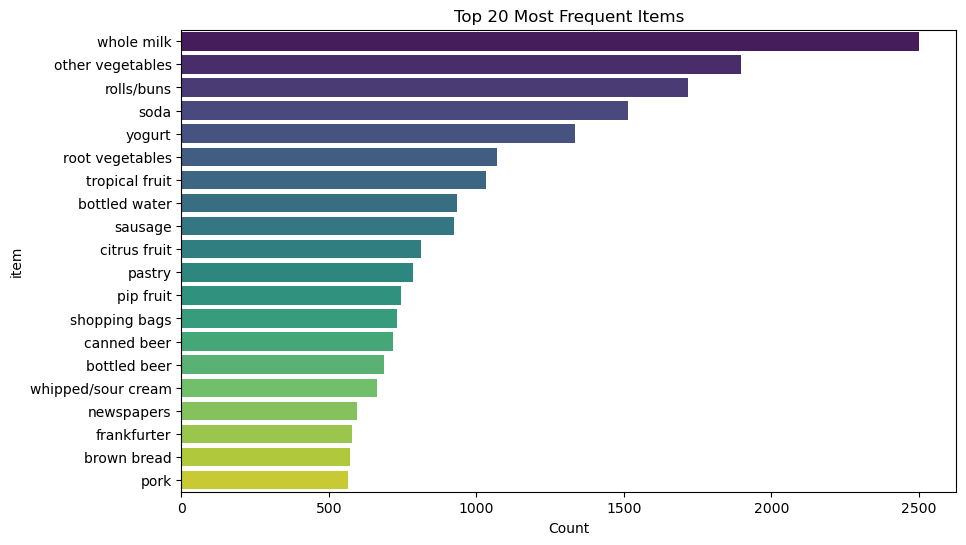

In [17]:
item_counts=data["itemDescription"].value_counts().head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=item_counts.values,y=item_counts.index,palette="viridis")
plt.title("Top 20 Most Frequent Items")
plt.xlabel("Count")
plt.ylabel("item")
plt.show()